In [147]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


## Assignment 8
## Name : Gaurav Bhogale
## Registration ID: SIRSS2101

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [149]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [150]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [151]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [152]:
data.loc[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [153]:
data.duplicated().sum()

1

In [154]:
len(data['age'].unique())

41

In [155]:
data.value_counts

<bound method DataFrame.value_counts of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  t

In [156]:
data.shape

(303, 14)

In [157]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [159]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [160]:
data.isnull().values.any()

False

In [161]:
data['output'].agg(['count','size','nunique'])

count      303
size       303
nunique      2
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

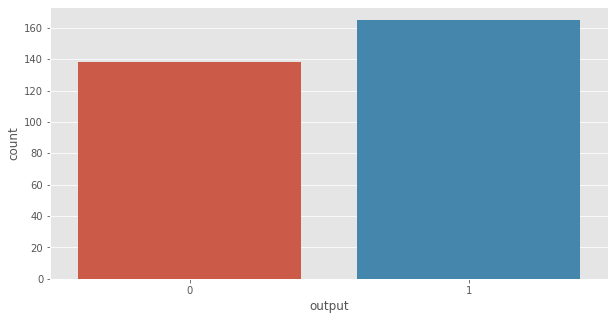

In [162]:
plt.figure(figsize=(10,5))
sns.countplot(x='output' , data=data)

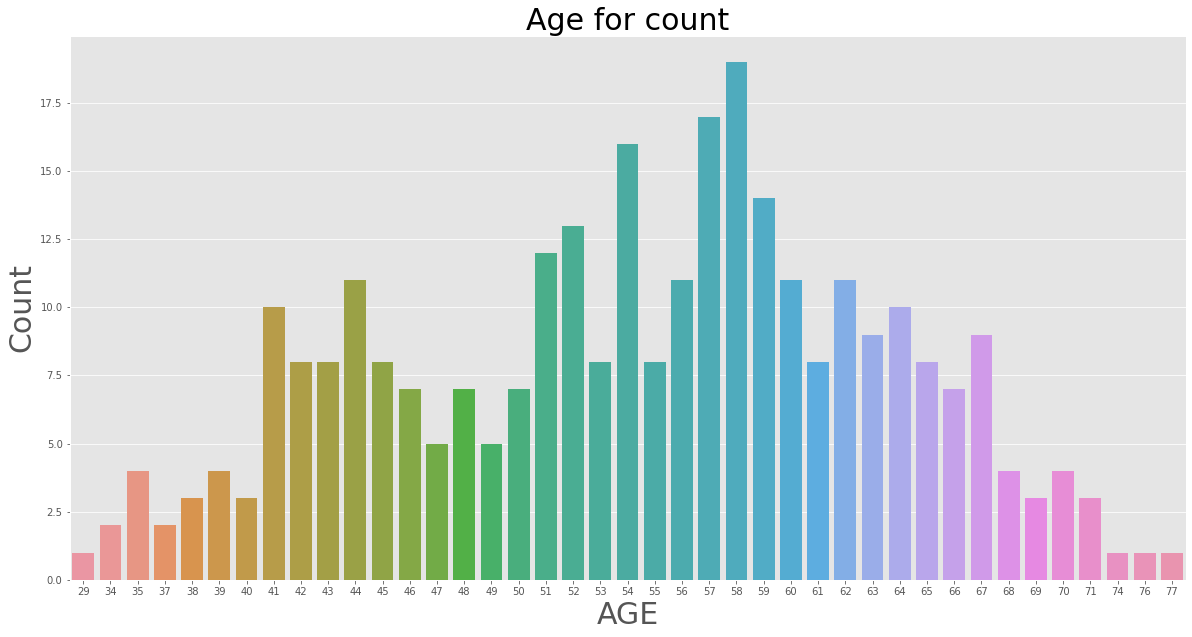

In [163]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['age'])
plt.title('Age for count',fontsize=30)
plt.xlabel('AGE',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.show()

<AxesSubplot:>

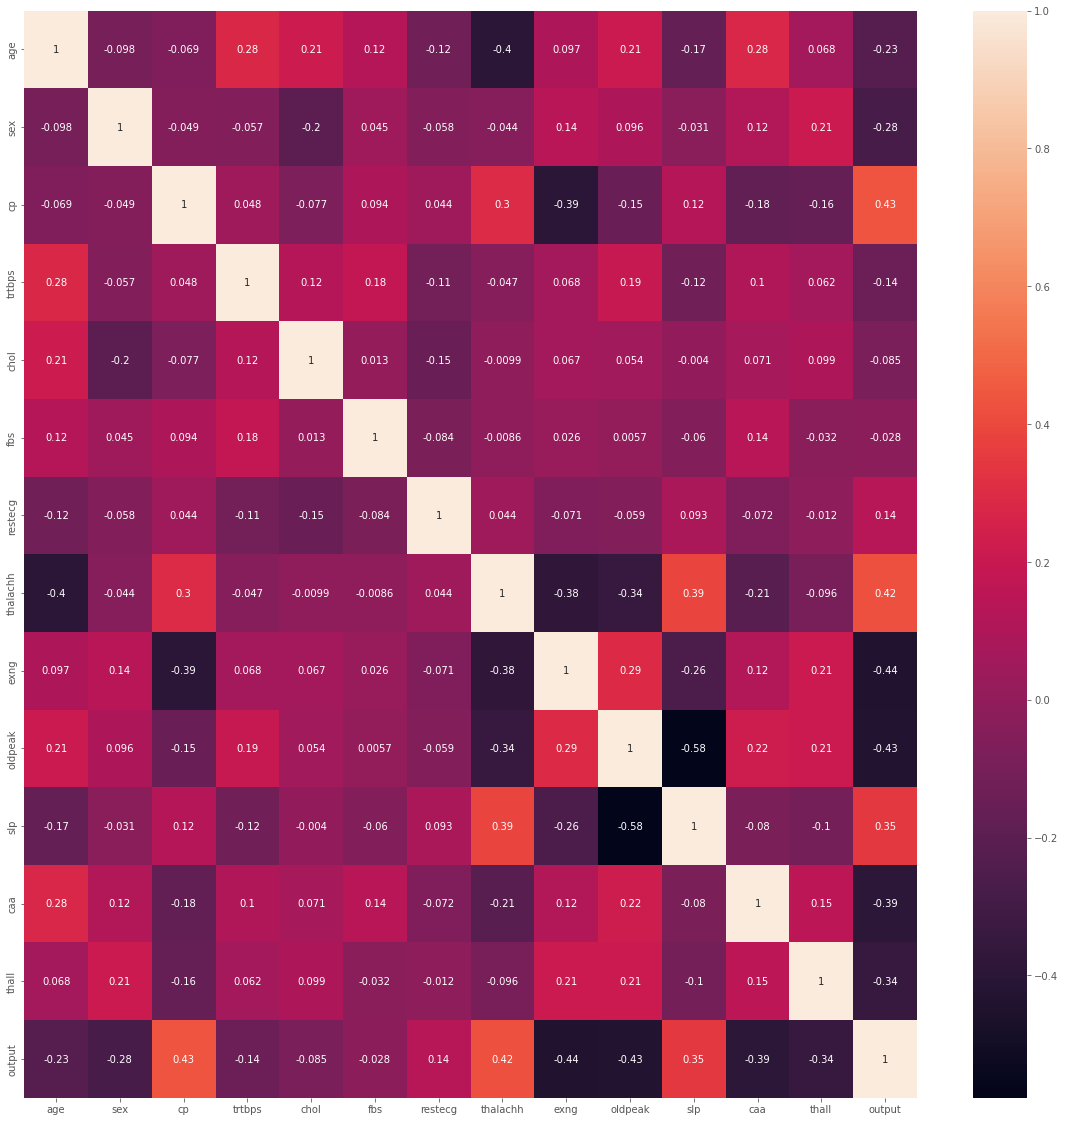

In [164]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

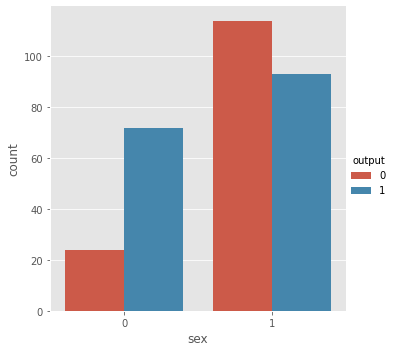

In [165]:
sns.catplot(x='sex', data=data, kind='count', hue='output')

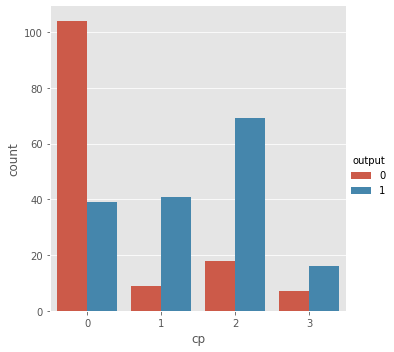

In [166]:
sns.catplot(x='cp', data=data, kind='count', hue='output')

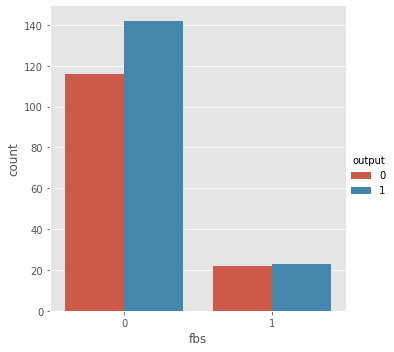

In [167]:
sns.catplot(x='fbs', data=data, kind='count', hue='output')

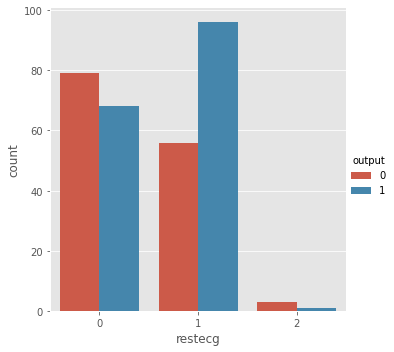

In [168]:
sns.catplot(x='restecg', data=data, kind='count', hue='output')

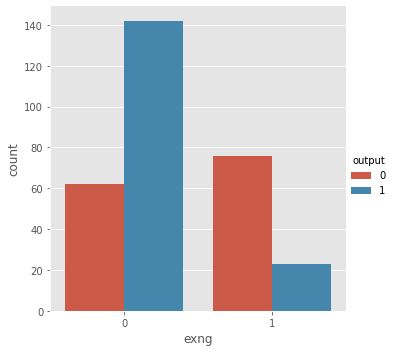

In [169]:
sns.catplot(x='exng', data=data, kind='count', hue='output')

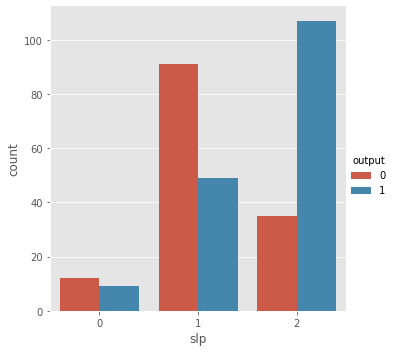

In [170]:
sns.catplot(x='slp', data=data, kind='count', hue='output')

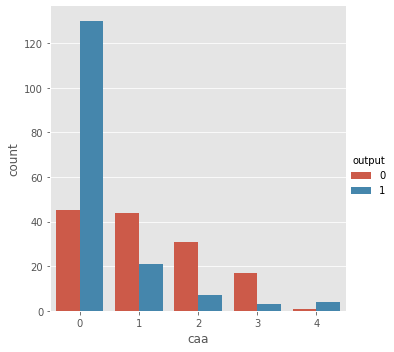

In [171]:
sns.catplot(x='caa', data=data, kind='count', hue='output')

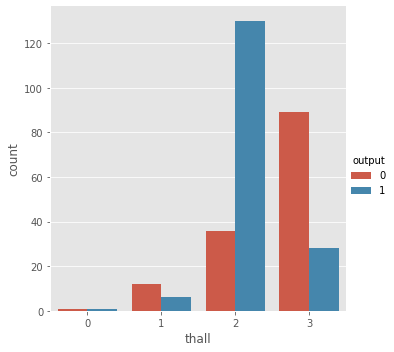

In [172]:
sns.catplot(x='thall', data=data, kind='count', hue='output')

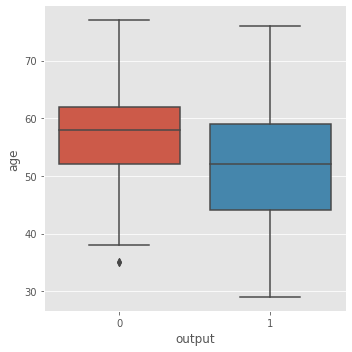

In [173]:
sns.catplot(x='output', y='age', data=data, kind='box')

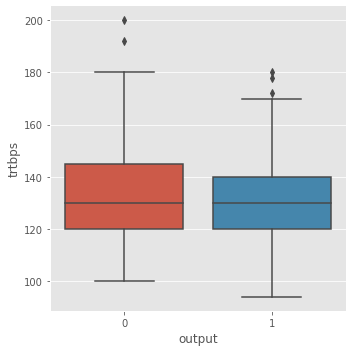

In [174]:
sns.catplot(x='output', y='trtbps', data=data, kind='box')

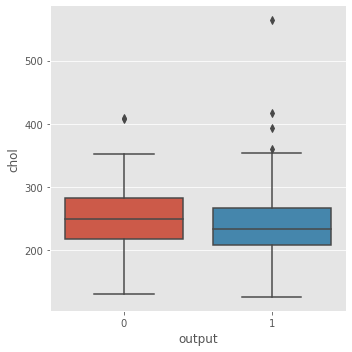

In [175]:
sns.catplot(x='output', y='chol', data=data, kind='box')

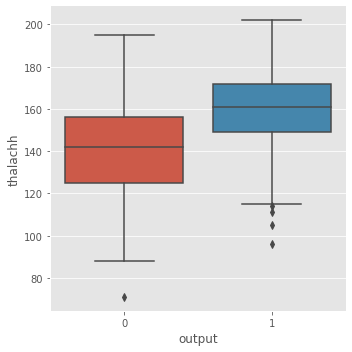

In [176]:
sns.catplot(x='output', y='thalachh', data=data, kind='box')

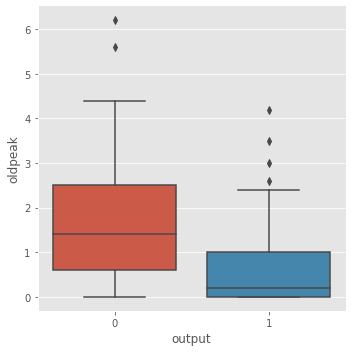

In [177]:
sns.catplot(x='output', y='oldpeak', data=data, kind='box')

In [178]:
chest_pain = data['cp'].value_counts().reset_index()

In [179]:
chest_pain

,index,cp
0,0,143
1,2,87
2,1,50
3,3,23


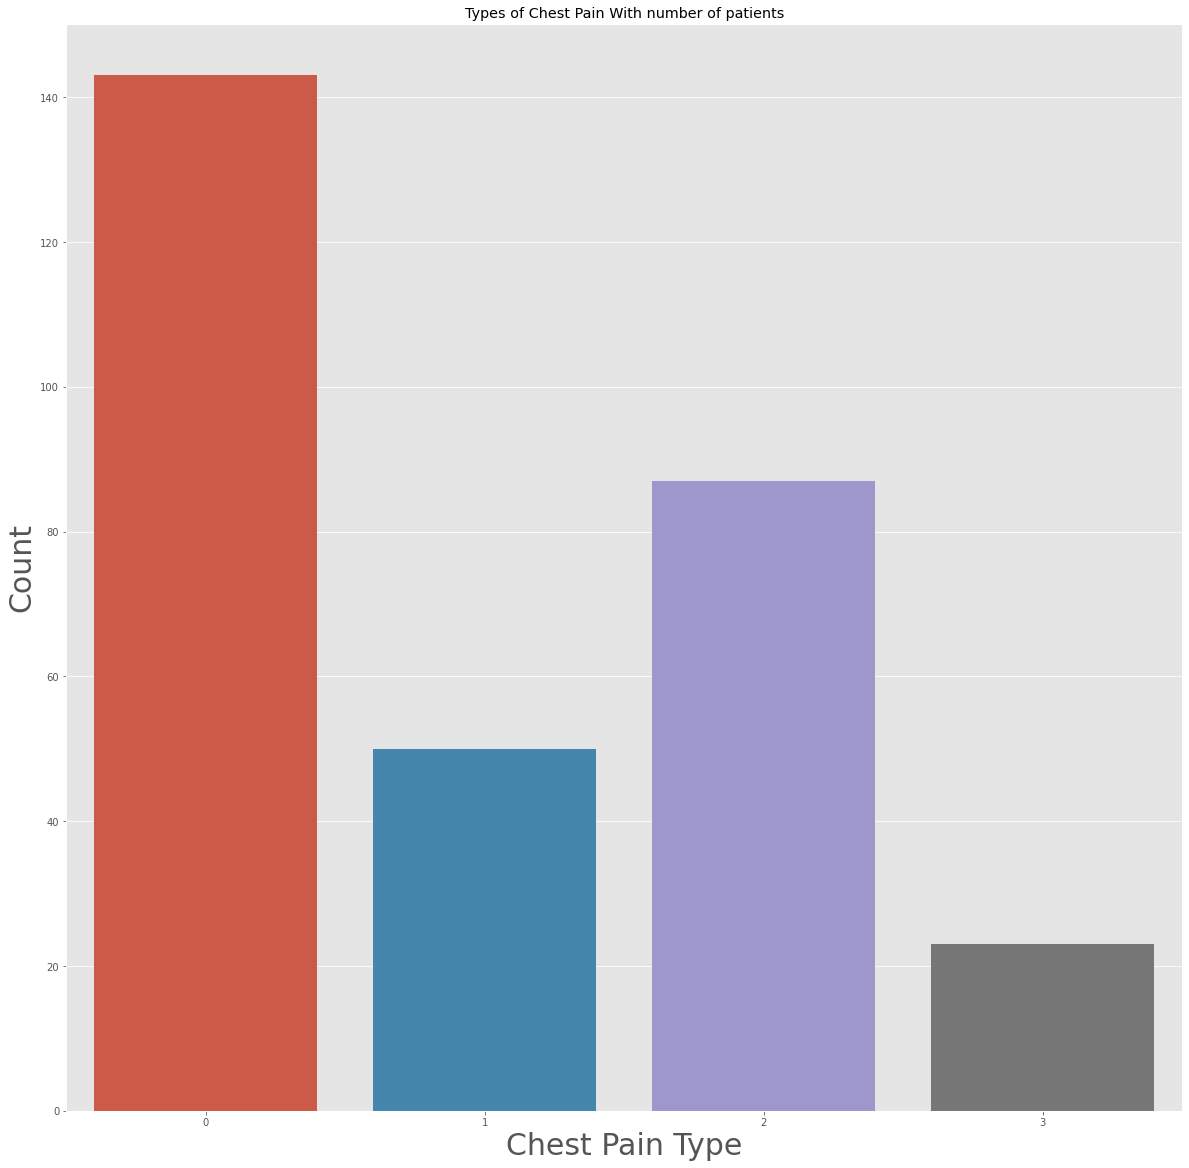

In [180]:
plt.figure(figsize=(20,20))
sns.barplot(x=chest_pain['index'], y=chest_pain['cp'])
plt.title('Types of Chest Pain With number of patients')
plt.xlabel('Chest Pain Type', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.show()

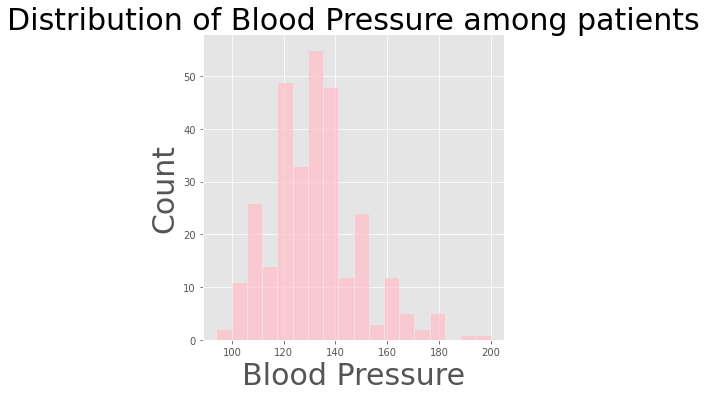

In [181]:
sns.displot(data['trtbps'], color='pink')
plt.title('Distribution of Blood Pressure among patients', fontsize=30)
plt.xlabel('Blood Pressure', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.show()

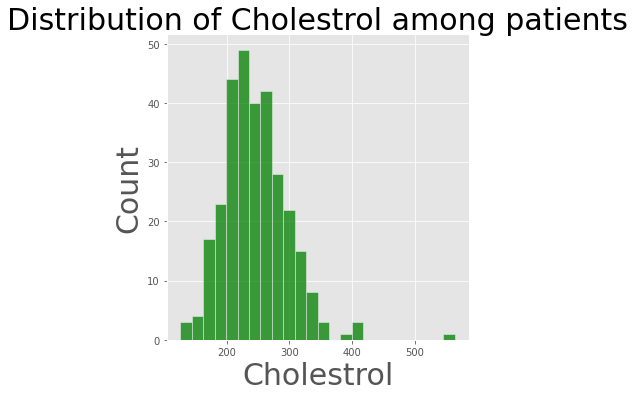

In [182]:
sns.displot(data['chol'], color='green')
plt.title('Distribution of Cholestrol among patients', fontsize=30)
plt.xlabel('Cholestrol', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.show()

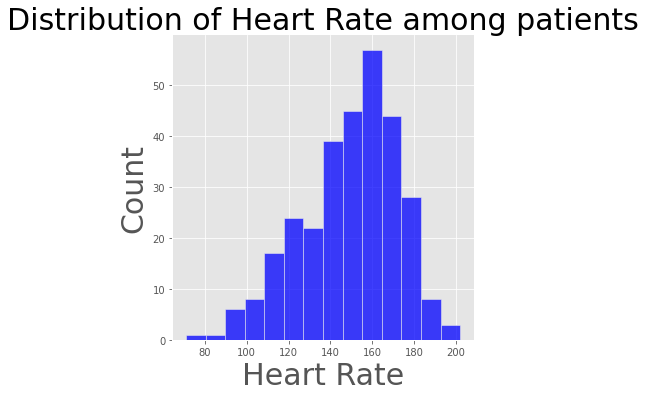

In [183]:
sns.displot(data['thalachh'], color='blue')
plt.title('Distribution of Heart Rate among patients', fontsize=30)
plt.xlabel('Heart Rate', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.show()

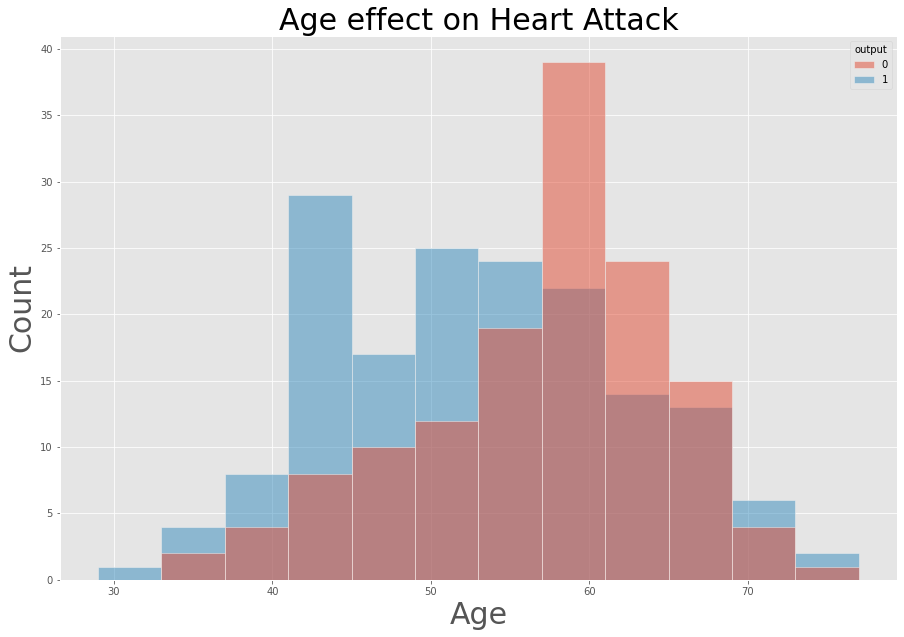

In [184]:
plt.figure(figsize=(15,10))
sns.histplot(data=data, x='age', hue='output')
plt.title("Age effect on Heart Attack", fontsize=30)
plt.xlabel("Age", fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.show()


<Figure size 2160x2160 with 0 Axes>

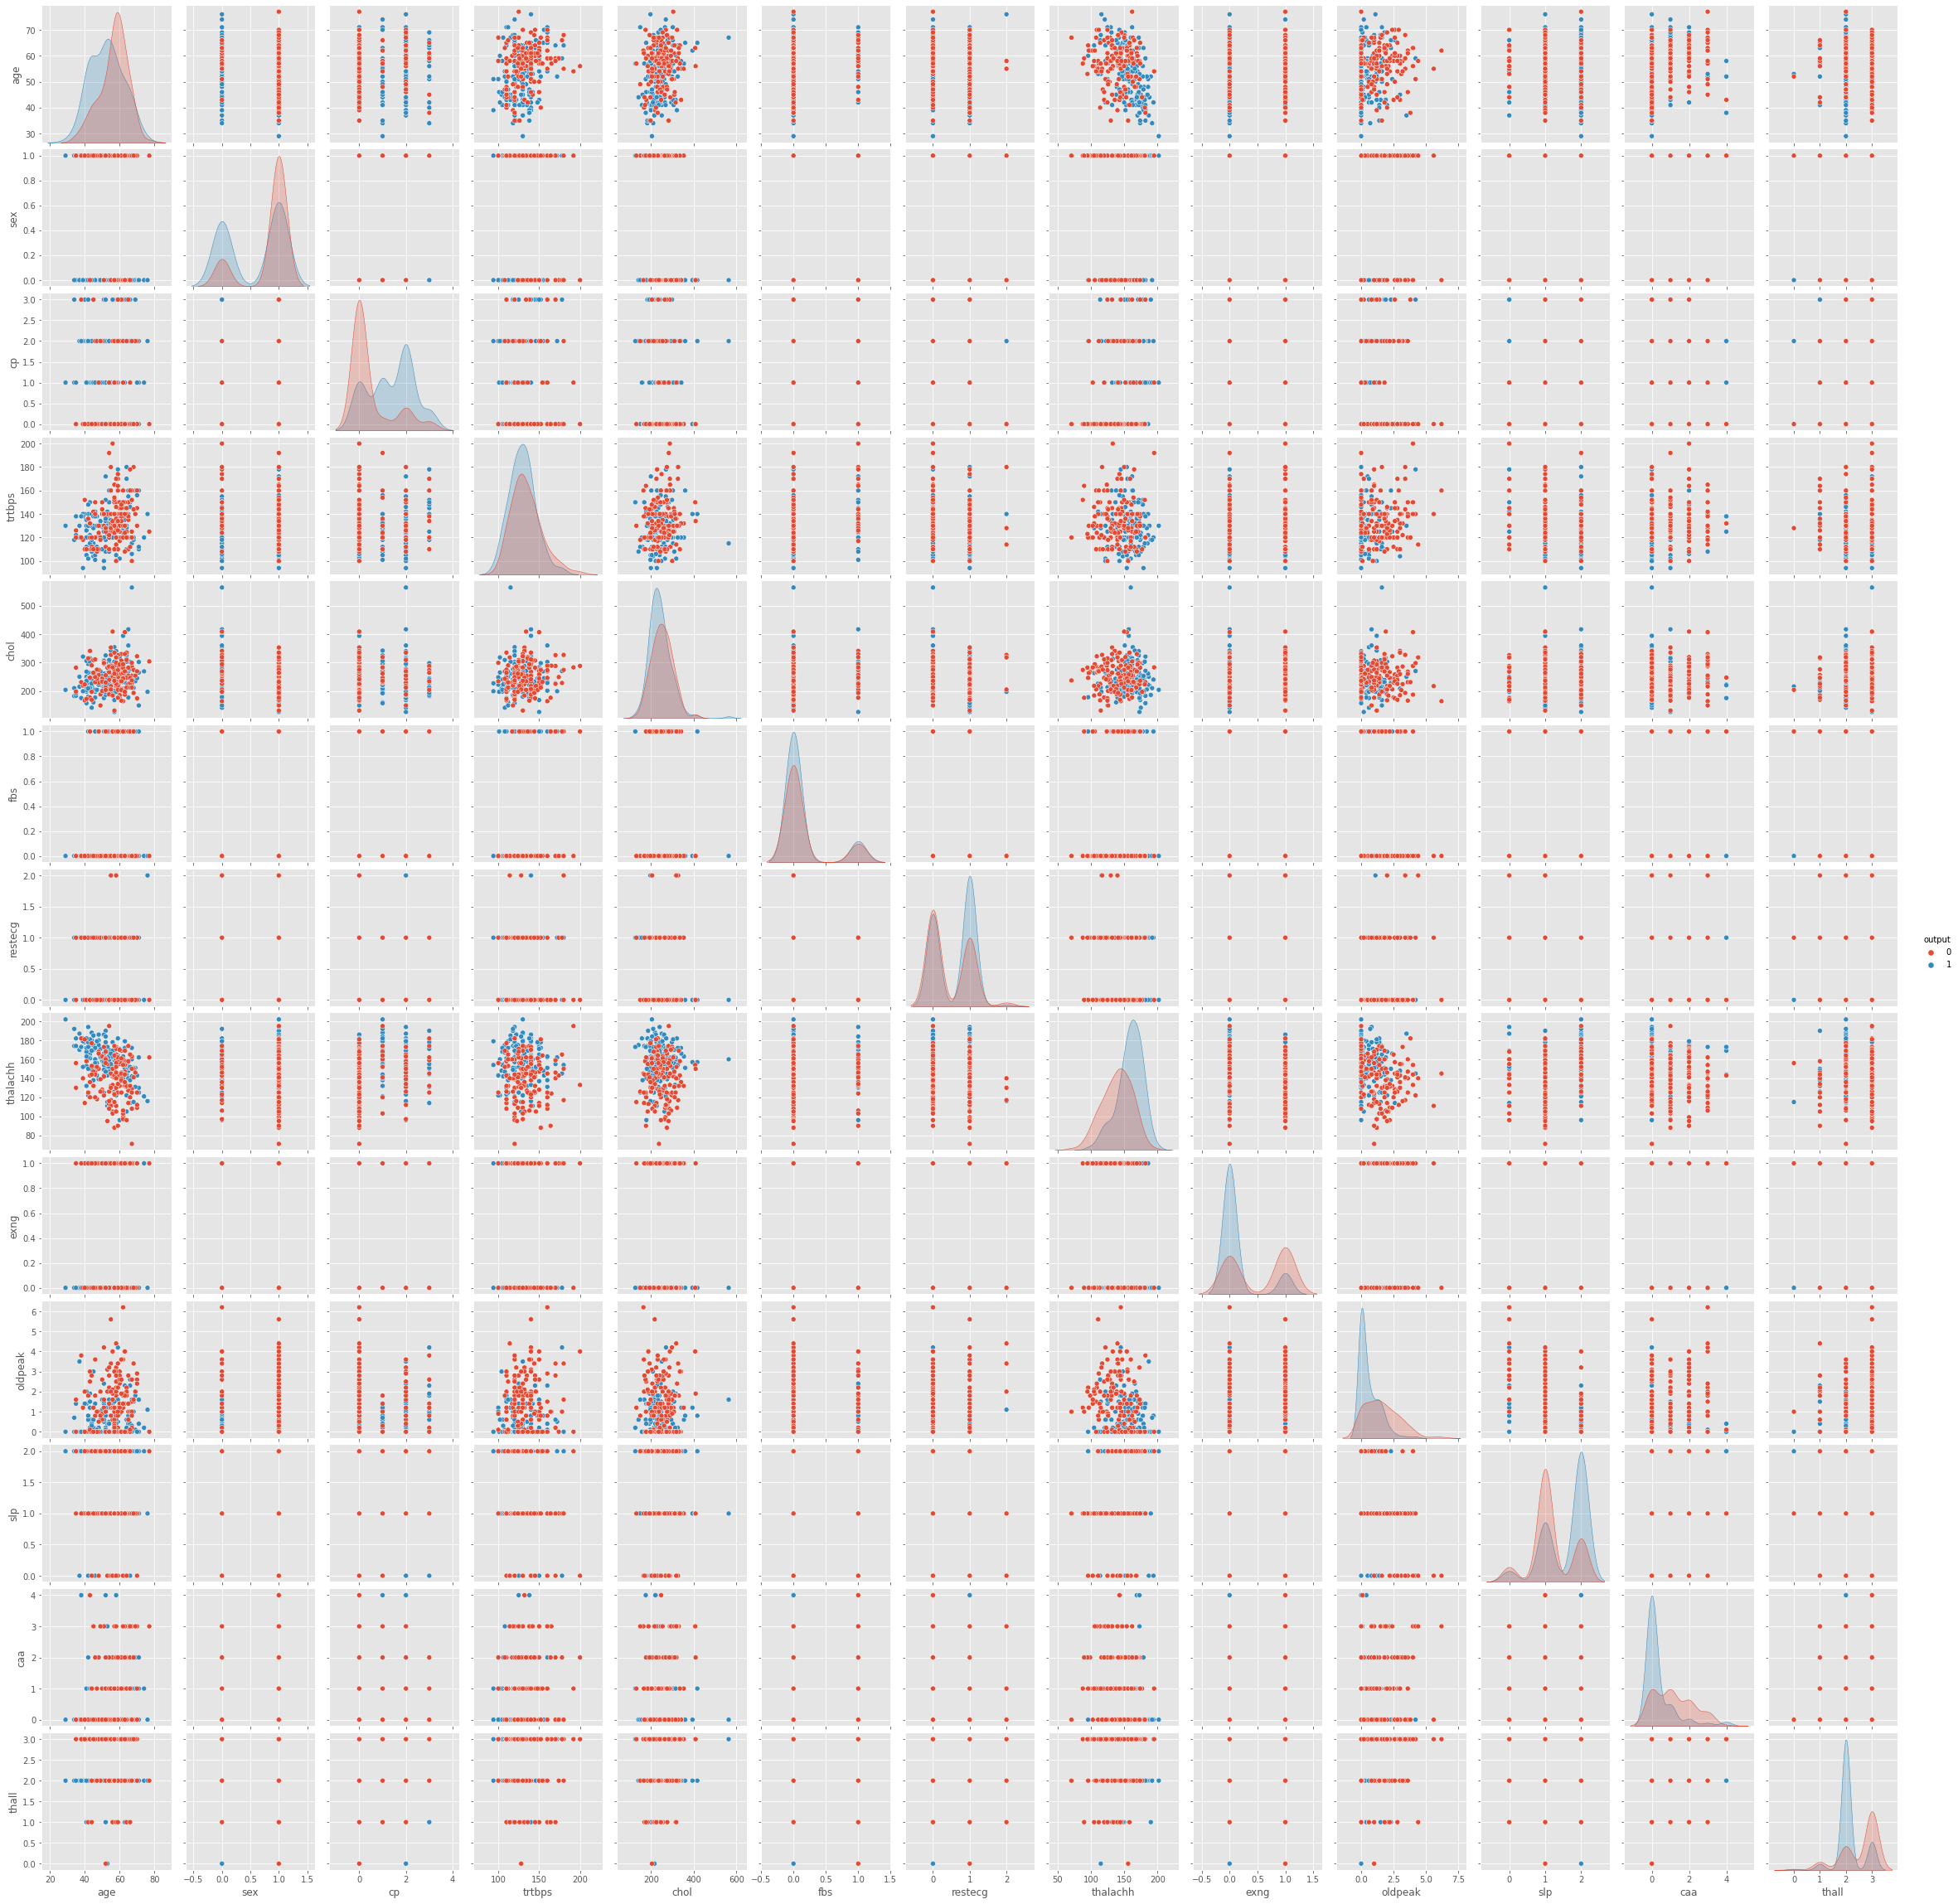

In [185]:
plt.figure(figsize=(30,30))
sns.pairplot(data, hue='output')

<Figure size 2160x2160 with 0 Axes>

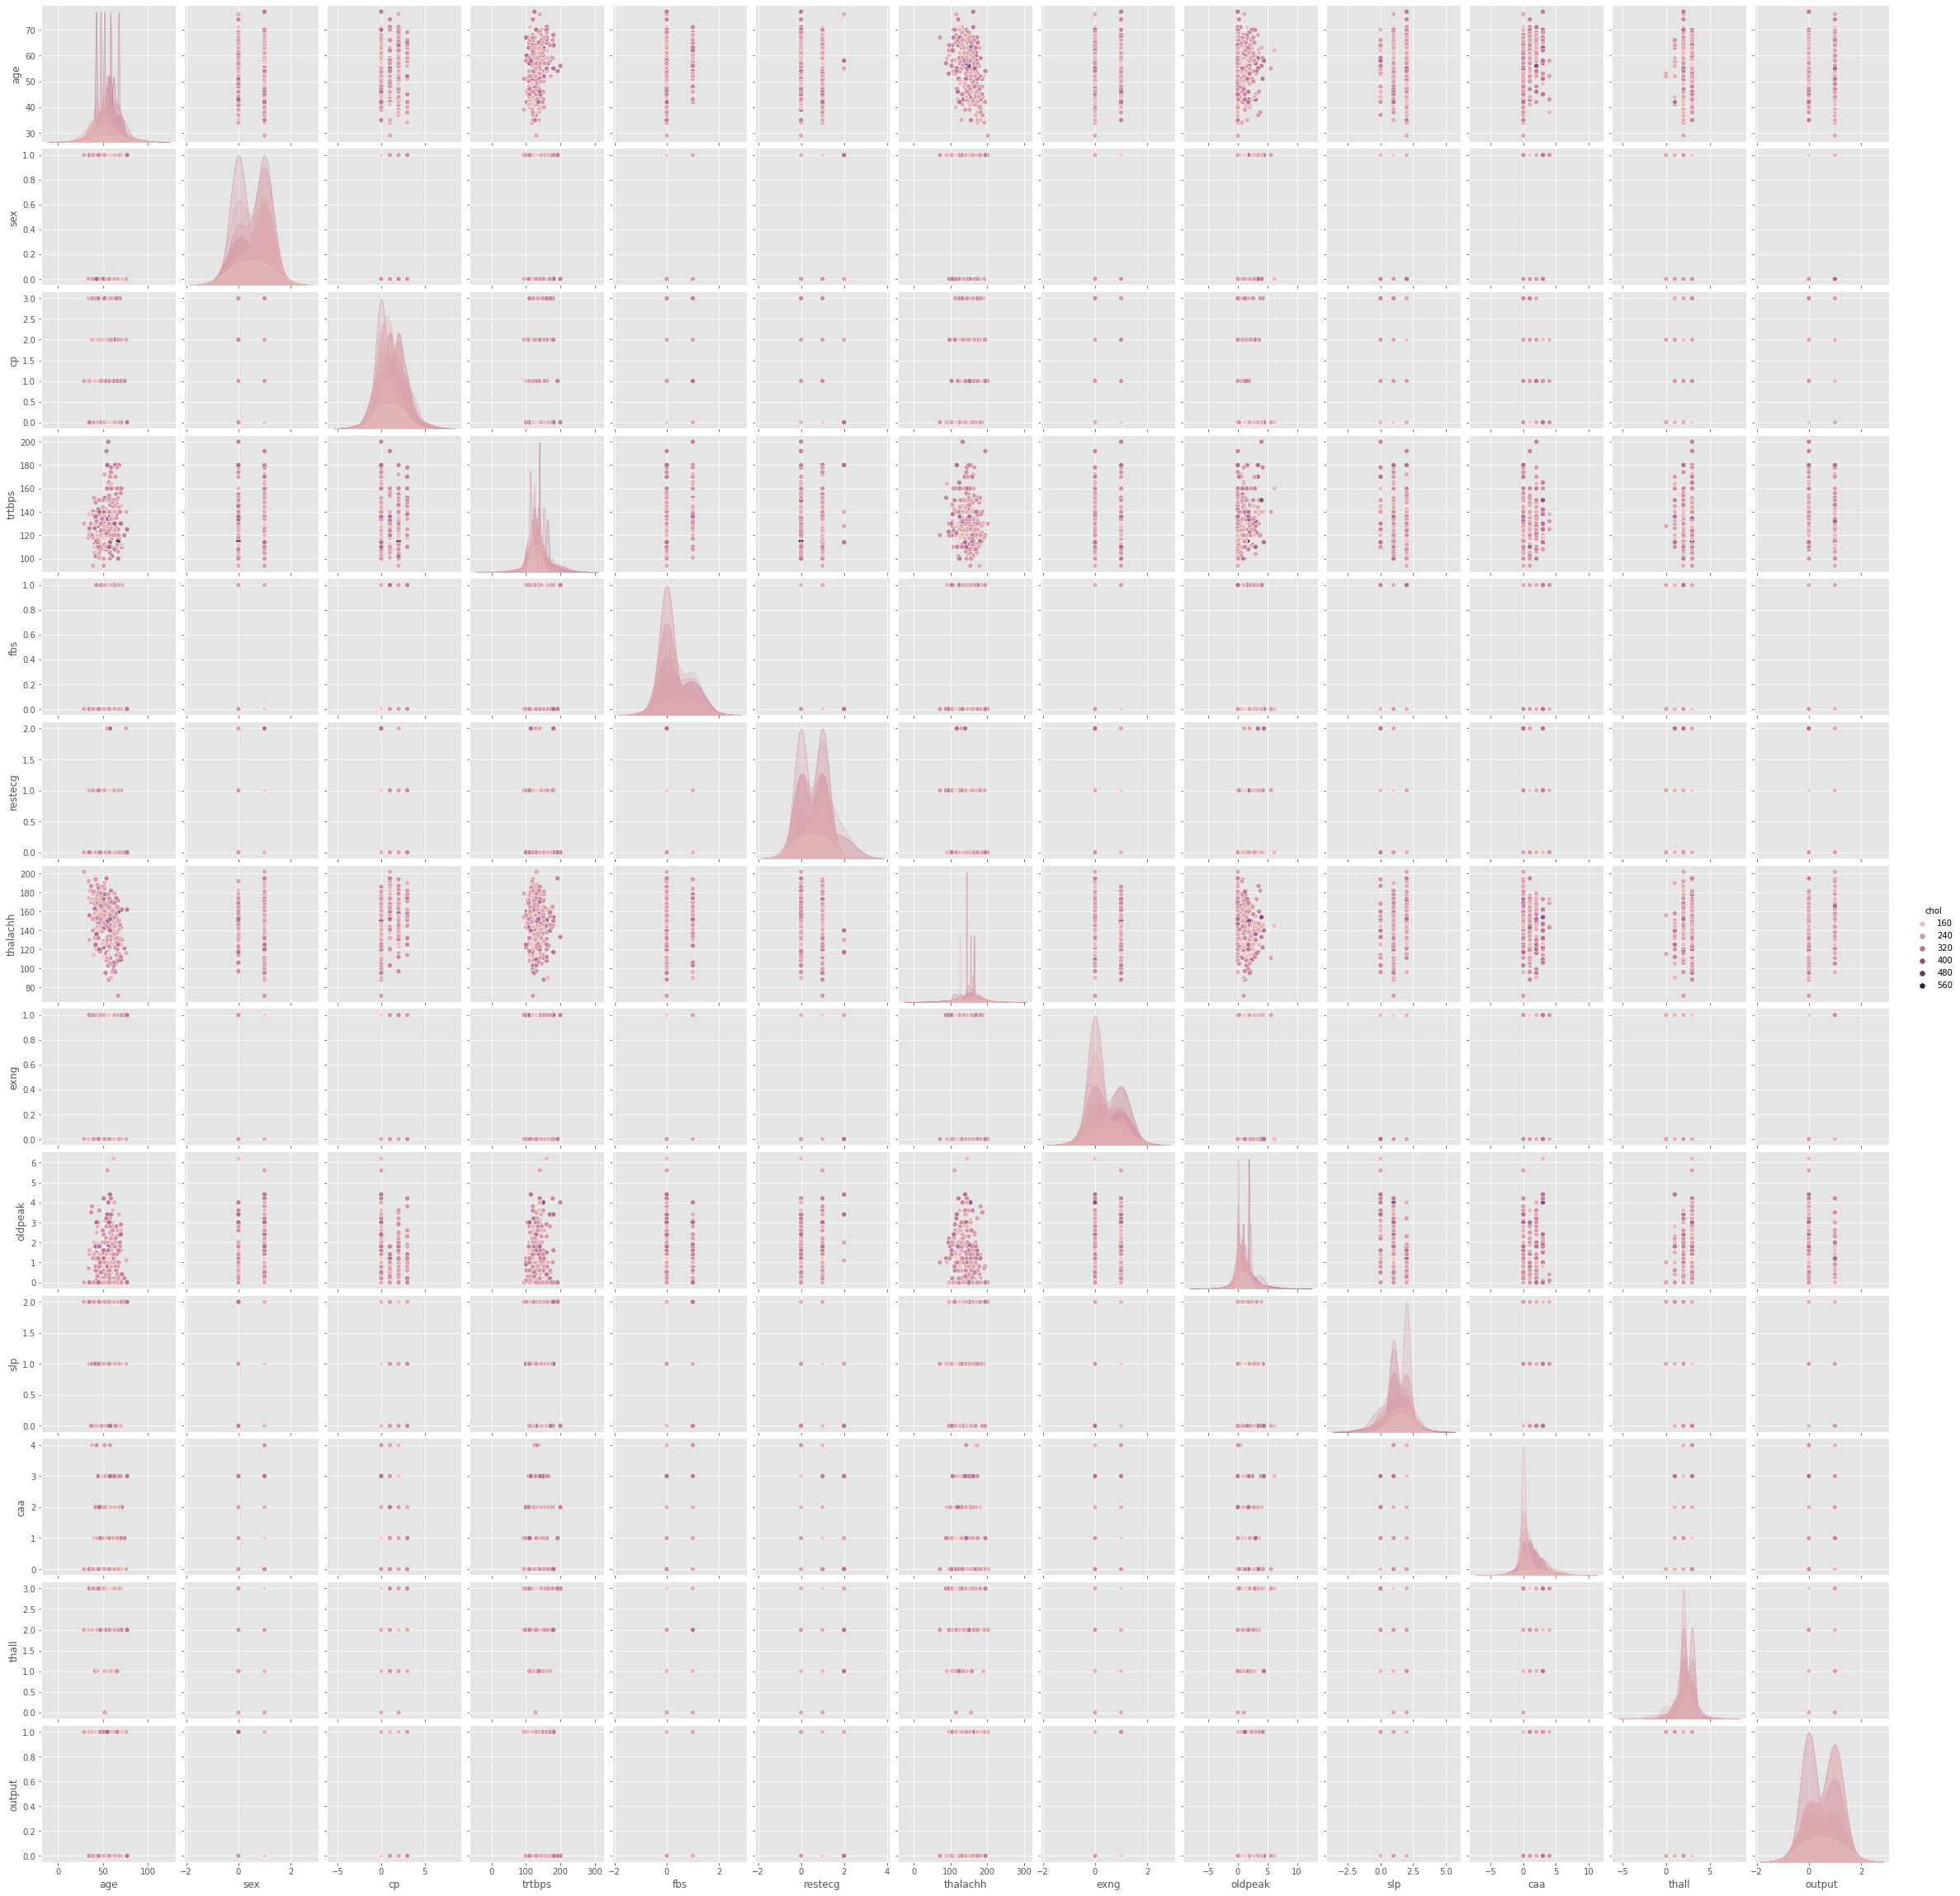

In [186]:
plt.figure(figsize=(30,30))
sns.pairplot(data, hue='chol')

In [187]:
data[['age','output']].value_counts().sort_values()

age  output
77   0          1
74   1          1
76   1          1
70   1          1
69   0          1
               ..
59   0          9
52   1          9
57   0         10
54   1         10
58   0         12
Length: 75, dtype: int64

In [188]:
a = pd.crosstab(data['age'],data['output']).reset_index()
a.columns = ['age','low risk','high risk']

In [189]:
a

,age,low risk,high risk
0,29,0,1
1,34,0,2
2,35,2,2
3,37,0,2
4,38,1,2
5,39,1,3
6,40,2,1
7,41,1,9
8,42,1,7
9,43,3,5


In [190]:
px.line(a,a['age'],a['high risk'],title='Risk of High heart attack with age')

In [191]:
b = data['sex'].value_counts().reset_index()
px.pie(b, names = 'index', values = 'sex')

In [192]:
px.line(a,a['age'],a['low risk'],title='Risk of Low heart attack with age')

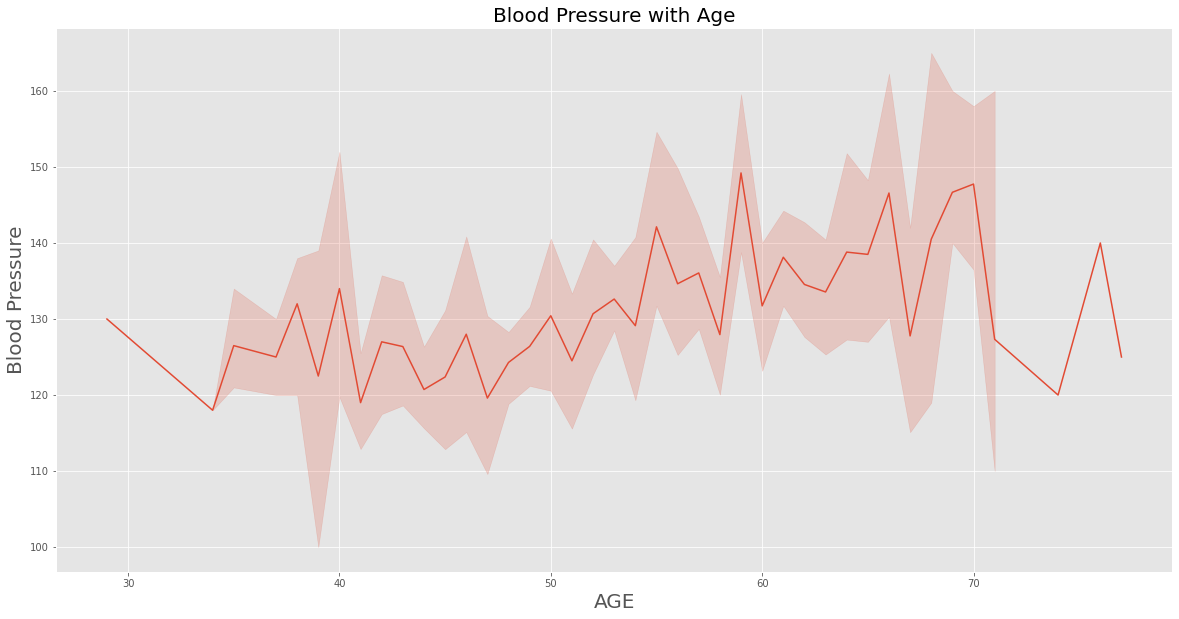

In [193]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.lineplot(y='trtbps',x='age',data=data)
plt.title('Blood Pressure with Age', fontsize=20)
plt.xlabel("AGE", fontsize=20)
plt.ylabel('Blood Pressure', fontsize=20)
plt.show()

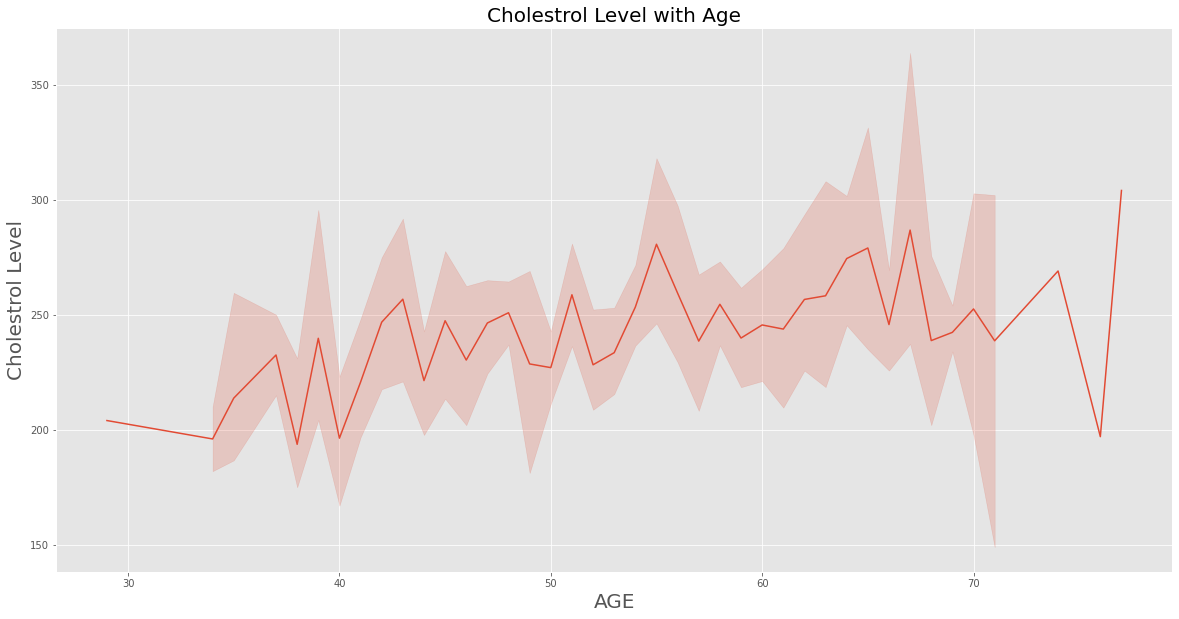

In [194]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.lineplot(y='chol',x='age',data=data)
plt.title('Cholestrol Level with Age', fontsize=20)
plt.xlabel("AGE", fontsize=20)
plt.ylabel('Cholestrol Level', fontsize=20)
plt.show()

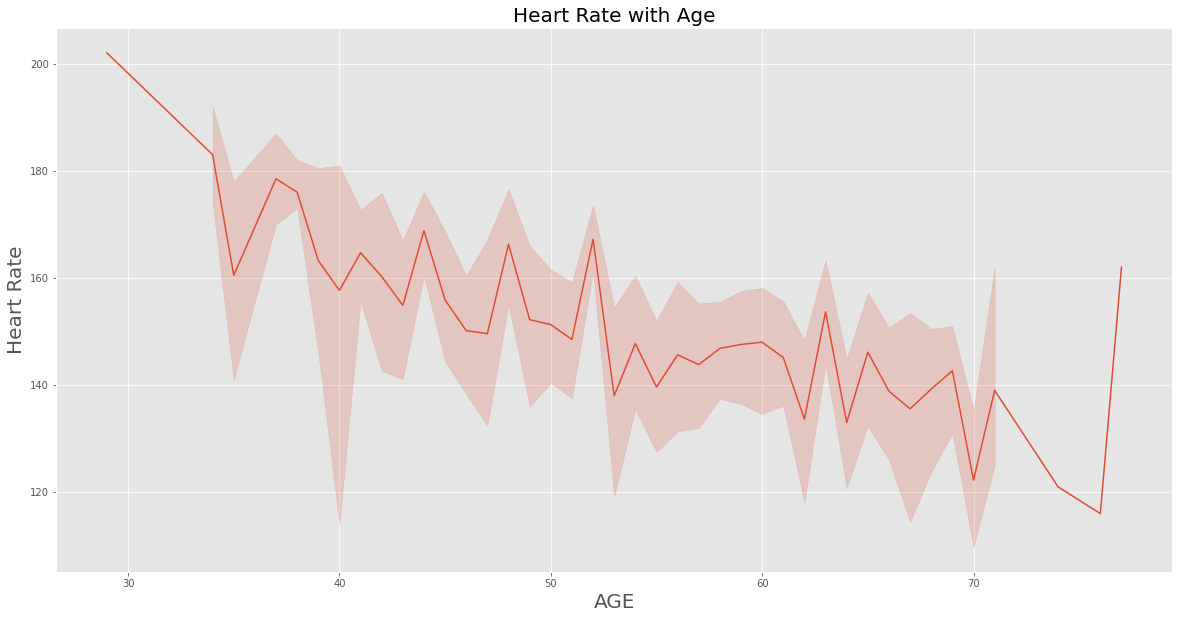

In [195]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.lineplot(y='thalachh',x='age',data=data)
plt.title('Heart Rate with Age', fontsize=20)
plt.xlabel("AGE", fontsize=20)
plt.ylabel('Heart Rate', fontsize=20)
plt.show()

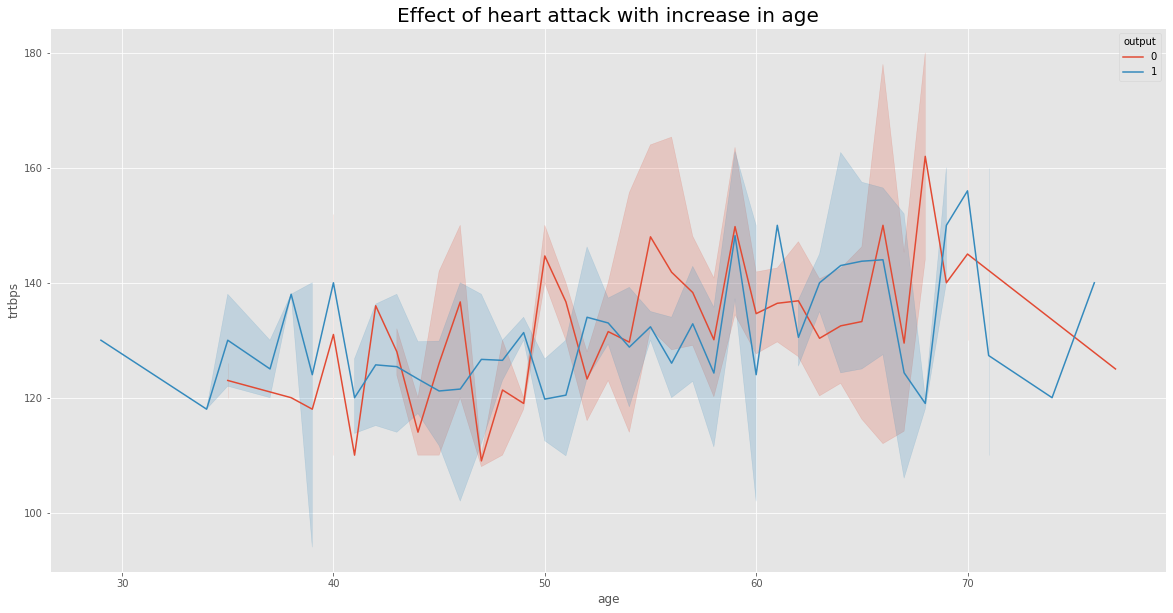

In [196]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.lineplot(y='trtbps',x='age',data=data,hue='output')
plt.title('Effect of heart attack with increase in age', fontsize=20)
plt.show()